In [1]:
import os
import json

In [2]:
#Replace with local files
paths = ['/mnt/faster0/rje41/checkpoints/results/experiment_1/add_sub_2_epochs/AddSub/checkpoint-270/graph.json',
         '/mnt/faster0/rje41/checkpoints/results/experiment_1/add_sub_2_epochs/AddSubInv/checkpoint-270/graph.json',
         '/mnt/faster0/rje41/checkpoints/results/experiment_1/add_sub_2_epochs/CondAddSub/checkpoint-270/graph.json',
         '/mnt/faster0/rje41/checkpoints/results/experiment_1/base_4_epochs_small_ds/AddBase8/checkpoint-200/graph.json',
         '/mnt/faster0/rje41/checkpoints/results/experiment_1/base_4_epochs_small_ds/AddBase9/checkpoint-200/graph.json',
         '/mnt/faster0/rje41/checkpoints/results/experiment_1/base_4_epochs_small_ds/AddBase10/checkpoint-200/graph.json']

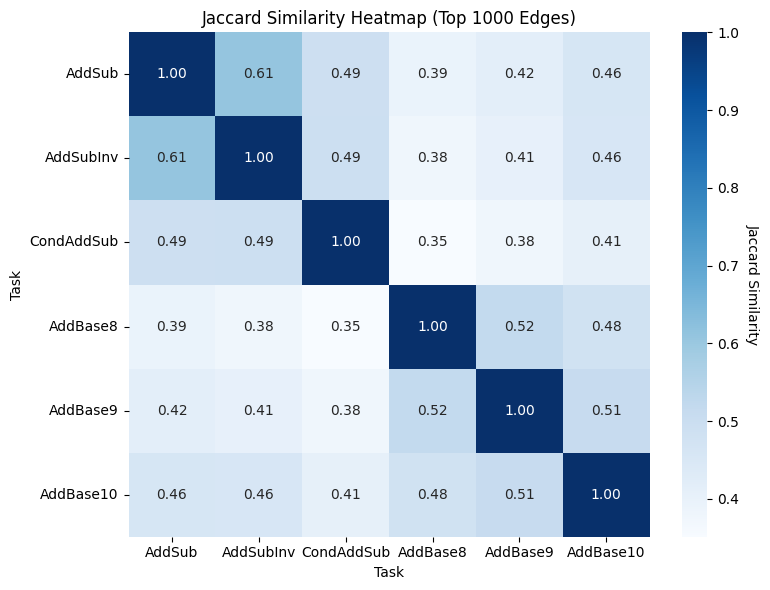

In [3]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

def topk_edges(edges, k=None, percent=None):
    if percent is not None:
        k = max(1, int(len(edges) * percent))

    sorted_edges = sorted(
    ((edge, data) for edge, data in edges.items() if data.get('in_graph', False)),
    key=lambda item: abs(item[1].get('score', 0)),
    reverse=True
    )
    return {edge: data for edge, data in sorted_edges[:k]}


def jaccard_similarity(edges_a, edges_b, k=None, percent=None):
    top_a = topk_edges(edges_a, k=k, percent=percent)
    top_b = topk_edges(edges_b, k=k, percent=percent)

    set_a = set(top_a.keys())
    set_b = set(top_b.keys())

    intersection = len(set_a & set_b)
    union = len(set_a | set_b)
    return intersection / union if union > 0 else 0.0

def plot_jaccard_heatmap(checkpoints, k=None, percent=None, custom_labels=None):
    n = len(checkpoints)
    sims = [[0.0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            sims[i][j] = jaccard_similarity(
                checkpoints[i]['edges'], checkpoints[j]['edges'], k=k, percent=percent
            )

    if custom_labels is None:
        custom_labels = [f"CP-{i}" for i in range(n)]

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        sims, annot=True, fmt=".2f", cmap="Blues", cbar=True,
        xticklabels=custom_labels,
        yticklabels=custom_labels
    )
    
    # add label to the colorbar
    cbar = ax.collections[0].colorbar
    cbar.set_label("Jaccard Similarity", rotation=270, labelpad=15)

    if k is not None:
        title = f"Jaccard Similarity Heatmap (Top {k} Edges)"
    else:
        title = f"Jaccard Similarity Heatmap (Top {int(percent*100)}% Scoring Edges)"
    
    plt.title(title)
    plt.xlabel("Task")
    plt.ylabel("Task")
    plt.tight_layout()
    plt.show()

checkpoints = []
for path in paths:
    with open(path, 'r') as f:
        data = json.load(f)
        checkpoints.append(data)

plot_jaccard_heatmap(checkpoints, k=1000, custom_labels = ['AddSub','AddSubInv','CondAddSub','AddBase8','AddBase9','AddBase10'])